In [1]:
# package
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns

In [2]:
# load data
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='wt', ylabel='mpg'>

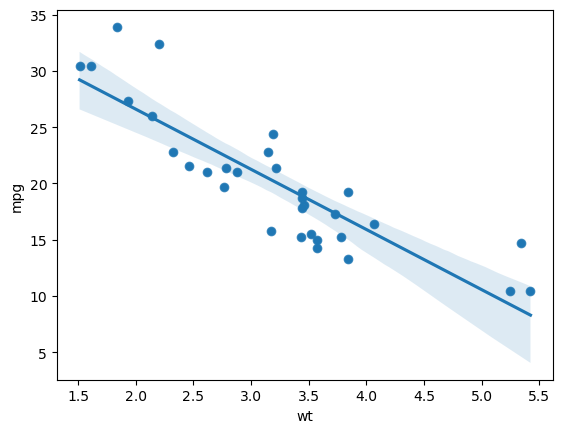

In [3]:
#visualise the model
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

## Convert data to tensor

In [6]:
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1, 1)
y_list = cars.mpg.values.tolist()


X = torch.from_numpy(X_np)
y = torch.tensor(y_list)

## Train


In [9]:
# initialize weights
w = torch.rand(1, requires_grad=True, dtype=torch.float32)
b = torch.rand(1, requires_grad=True, dtype=torch.float32)

In [10]:
# trainning

num_epochs = 1000
learning_rate = 0.001

for epoch in range(num_epochs):
    for i in range(len(X)):
        # forward pass
        y_pred = X[i] * w + b

        # calculate loss
        loss_tensor = torch.pow(y_pred - y[i], 2)


        # backward pass
        loss_tensor.backward()


        # extract losses
        loss_value = loss_tensor.item()

        # update weights and biases
        with torch.no_grad():
            w -= w.grad * learning_rate
            b -= b.grad * learning_rate

            w.grad.zero_()
            b.grad.zero_()
            
        print(loss_value)

379.9959411621094
364.5036315917969
432.87493896484375
346.7917175292969
235.4087677001953
205.4391326904297
101.24334716796875
410.2972106933594
332.96002197265625
193.07325744628906
147.34152221679688
91.12754821777344
112.62501525878906
65.90548706054688
0.48159927129745483
0.1382504403591156
22.82722282409668
754.8674926757812
686.7922973632812
846.9884033203125
230.8723602294922
46.2376823425293
42.21623611450195
12.651463508605957
87.12260437011719
460.1578369140625
379.0001525878906
633.55322265625
39.21574020385742
121.87683868408203
16.544750213623047
154.5896453857422
150.01895141601562
128.84356689453125
210.55291748046875
106.77881622314453
45.32752227783203
34.805179595947266
2.5956192016601562
164.60845947265625
122.52095031738281
39.6329345703125
22.40962028503418
1.301058053970337
9.745667457580566
0.5816255807876587
80.12194061279297
81.0407943725586
15.263818740844727
564.2003173828125
545.047119140625
673.799072265625
125.63500213623047
2.067596435546875
1.9356923103

## Model evaluation

In [11]:
print(f"Weight: {w.item()}, Bias: {b.item()}")

Weight: -5.230905055999756, Bias: 36.81059646606445


In [ ]:
# convert prediction to numpy
y_pred = ((X*w) + b).detach().numpy()

In [15]:
y_pred.shape

(32, 1)

<Axes: >

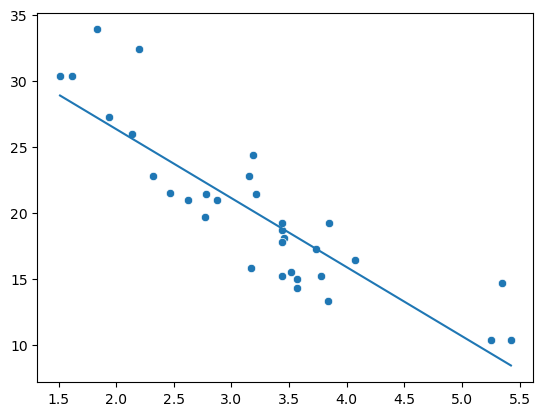

In [17]:
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred.reshape(-1))